# EDA

See a comperhansive overview and details on this dataset [here](https://www.kaggle.com/ajay1735/hmeq-data).

In this stage of The Project, the data will be explored using commonly used methods in the folowing steps:

1. **Basic Data Exploration** - check what the data set comprises of in terms of:
    * Shape of the dataset
    * Data Types, missing values outliers
    * Inconsistencies (e.g. "Mr" vs "mr.") etc.
    * Visualizations
    * Etc.
2. **Reshaping Data** - changing the data:
    * Handeling duplications/invalid entries/outliers.
    * Data transformations.
    * Feature engineering.
    * Etc.
    
    
 
## Basic Data Exploration

before begining the analysis the data will be split to avoid data leakage.
first the data will split to inputes and targets, and then to the Train and Test sets, and then split the training data to the validation set.
The data is small so a cross validation is needed to be representative enough to the data's actual distribution and bias and prevent overfitting.

In [2]:
import pandas as pd
import cufflinks as cf; cf.go_offline()
df = pd.read_csv("Data/hmeq.csv")
df.shape

(5960, 13)

In [3]:
df.sample(3)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
1401,0,10800,31149.0,67239.0,DebtCon,Mgr,NaN,NaN,NaN,NaN,NaN,NaN,35.265437
4041,0,21100,91479.0,127110.0,DebtCon,Office,25.0,0.0,0.0,279.468237,3.0,16.0,33.078522
5920,0,68100,193298.0,288525.0,DebtCon,Self,10.0,0.0,0.0,228.287295,2.0,25.0,30.395869


In [4]:
from sklearn.model_selection import train_test_split
X = df.drop("BAD", axis = 1)
y = df["BAD"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=0.25) # 25% of 80% is 20%
print(f"Train set: X_train size: {X_train2.shape}, X_train size: {y_train2.shape}")
print(f"Cross val set: X_train size: {X_val.shape}, X_train size: {y_val.shape}")
print(f"test set: X_train size: {X_test.shape}, X_train size: {y_test.shape}")

Train set: X_train size: (3576, 12), X_train size: (3576,)
Cross val set: X_train size: (1192, 12), X_train size: (1192,)
test set: X_train size: (1192, 12), X_train size: (1192,)


In [5]:
Train = X_train2.copy()
Train["BAD"] = y_train2
Train.sample(3)# display how the data looks after prep

,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,BAD
5137,27600,150120.0,191972.0,HomeImp,Self,3.0,0.0,0.0,178.038491,1.0,16.0,41.807428,0
5457,32500,232057.0,286938.0,DebtCon,ProfExe,15.0,0.0,1.0,249.954933,2.0,26.0,25.254772,0
4704,24800,64537.0,93212.0,DebtCon,ProfExe,7.0,1.0,1.0,120.351420,4.0,25.0,34.686089,0


In [6]:
#cv set
Cross_val = X_val.copy()
Cross_val["BAD"] = y_val

#test set
Test = X_test.copy()
Test["BAD"] = y_test

print(f"Cross val set shape: {Cross_val.shape}, Test set shape: {Test.shape}")

Cross val set shape: (1192, 13), Test set shape: (1192, 13)


Now the data is split to 3 sets:

* **Training:** 60%

* **Cross validation:** 20%

* **Testing:** 20%

now the main focus will be on the train set

## Basic Data Exploration

Here we will try to better understand the data:

In [7]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3576 entries, 5089 to 1266
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   LOAN     3576 non-null   int64  
 1   MORTDUE  3272 non-null   float64
 2   VALUE    3504 non-null   float64
 3   REASON   3426 non-null   object 
 4   JOB      3411 non-null   object 
 5   YOJ      3264 non-null   float64
 6   DEROG    3151 non-null   float64
 7   DELINQ   3229 non-null   float64
 8   CLAGE    3384 non-null   float64
 9   NINQ     3262 non-null   float64
 10  CLNO     3434 non-null   float64
 11  DEBTINC  2831 non-null   float64
 12  BAD      3576 non-null   int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 391.1+ KB


It seems the data has null columns, numeric and categoric data types.

let's see how much data is missing for all columns:

In [8]:
#missing data
total = Train.isnull().sum().sort_values(ascending=False)
percent = round(Train.isnull().sum()/Train.shape[0]*100,2).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
DEBTINC,745,20.83
DEROG,425,11.88
DELINQ,347,9.70
NINQ,314,8.78
YOJ,312,8.72
MORTDUE,304,8.50
CLAGE,192,5.37
JOB,165,4.61
REASON,150,4.19
CLNO,142,3.97


### Loan amount
let's see the distribution of the LOAN column:

In [9]:
Train.LOAN.describe() # number of unique values for LOANS that has been requested

count     3576.000000
mean     18503.691275
std      11302.522415
min       1100.000000
25%      11000.000000
50%      16200.000000
75%      23300.000000
max      89200.000000
Name: LOAN, dtype: float64

We see that Loans have a high variance and the mean is higher than the median,
let's plot the column:

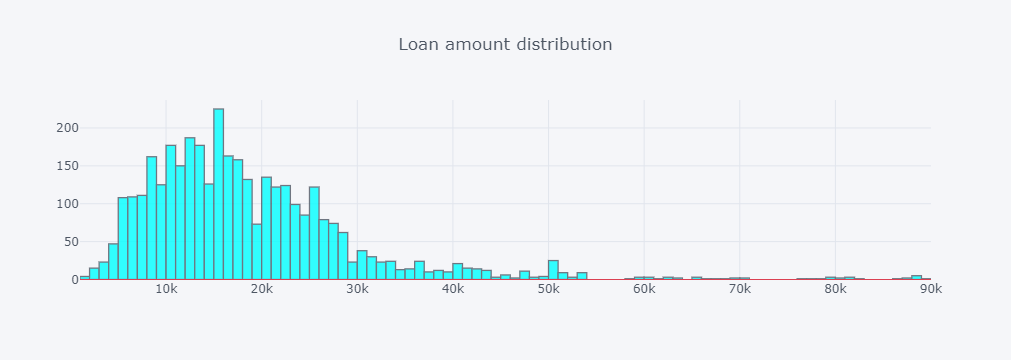

In [10]:
Train.LOAN.iplot(kind='hist', title = 'Loan amount distribution', hline=(0), color = ['cyan'])

We see that Loans have a high variance and the mean is higher than the median,
let's plot the column:

### Target Variable

let's see the distribution of the target column:

In [11]:
Train.BAD.value_counts()/Train.shape[0]*100,2

(0    80.257271
 1    19.742729
 Name: BAD, dtype: float64,
 2)

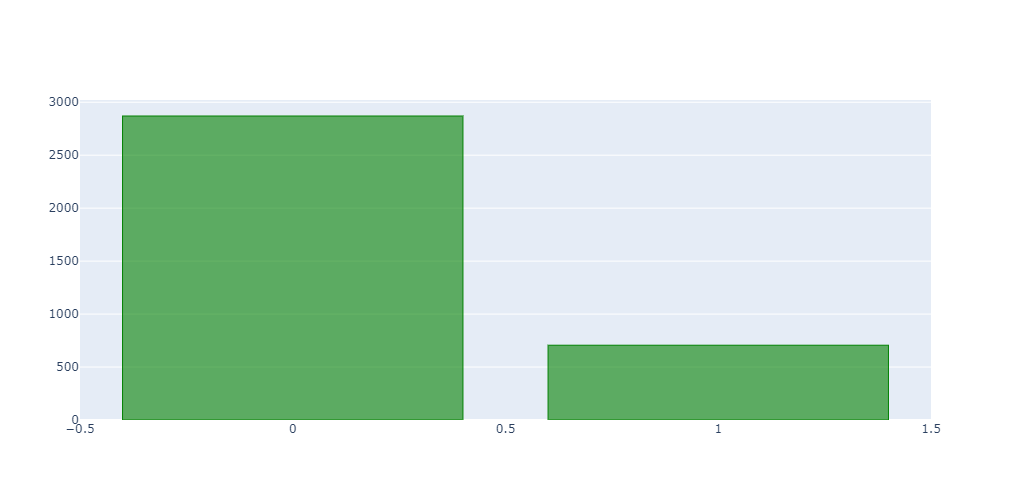

In [12]:
target_layout = cf.Layout(
    height=500,
    width=400
)
Train.BAD.value_counts().iplot(kind='bar',layout = target_layout, title = 'Default Flag distribution', hline=(0),colors=['green'])

### Numeric variables

now we will inspect the other numeric varaibles:

In [13]:
Floats = Train.select_dtypes(include = "float64").columns.tolist() #float variables
Train[Floats].describe()

,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,3272.000000,3504.000000,3264.000000,3151.000000,3229.000000,3384.000000,3262.000000,3434.000000,2831.000000
mean,73359.805865,101286.231701,9.000368,0.239606,0.444410,180.759987,1.159718,21.321200,33.694731
std,43950.146317,54897.955501,7.600467,0.813399,1.133208,86.446147,1.697608,10.136682,8.234589
min,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.486711,0.000000,0.000000,0.720295
25%,46032.250000,66069.000000,3.000000,0.000000,0.000000,115.572344,0.000000,15.000000,29.113294
50%,64881.000000,89312.500000,7.000000,0.000000,0.000000,174.513985,1.000000,20.000000,34.777089
75%,91199.750000,118736.000000,13.000000,0.000000,0.000000,232.293385,2.000000,26.000000,38.965619
max,399550.000000,855909.000000,41.000000,10.000000,15.000000,1154.633333,14.000000,71.000000,143.949605


now we will visualize this data:

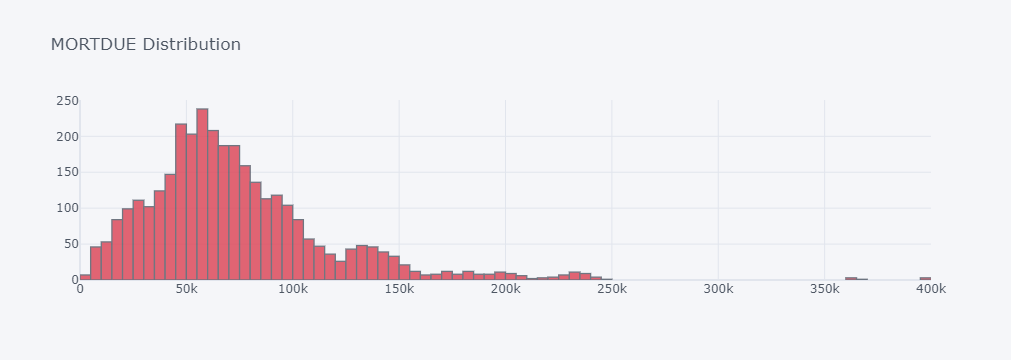

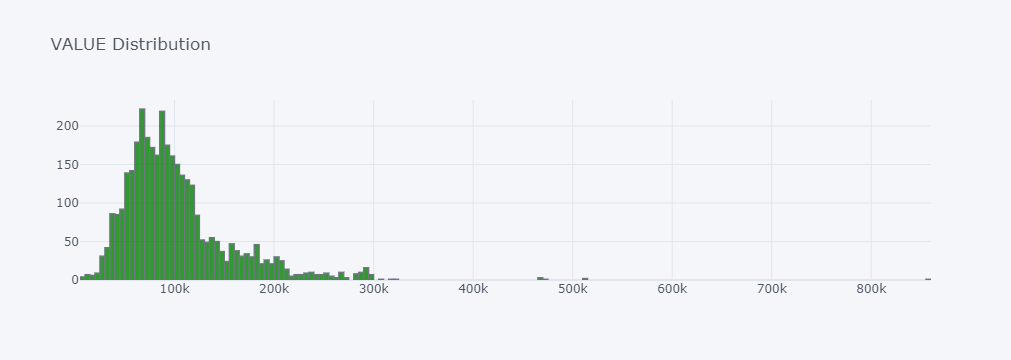

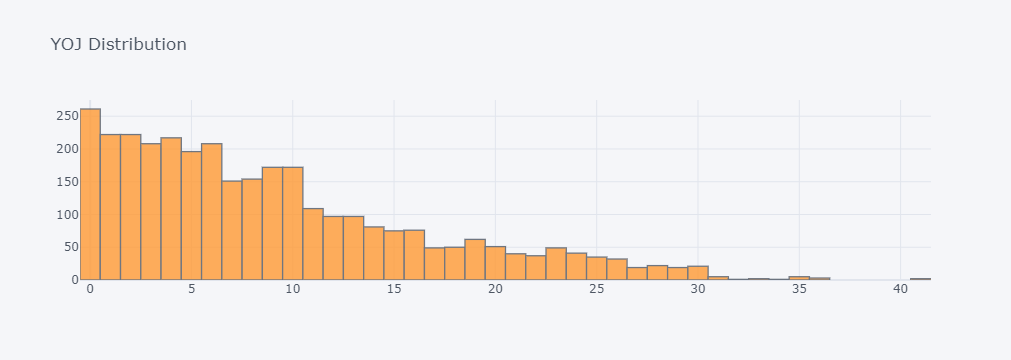

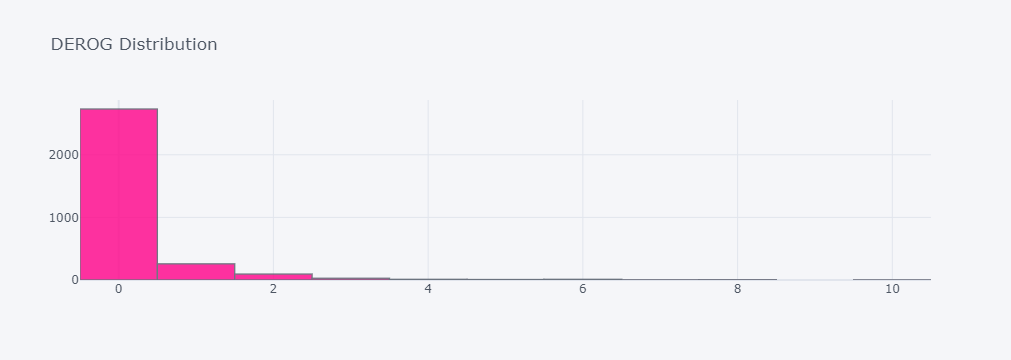

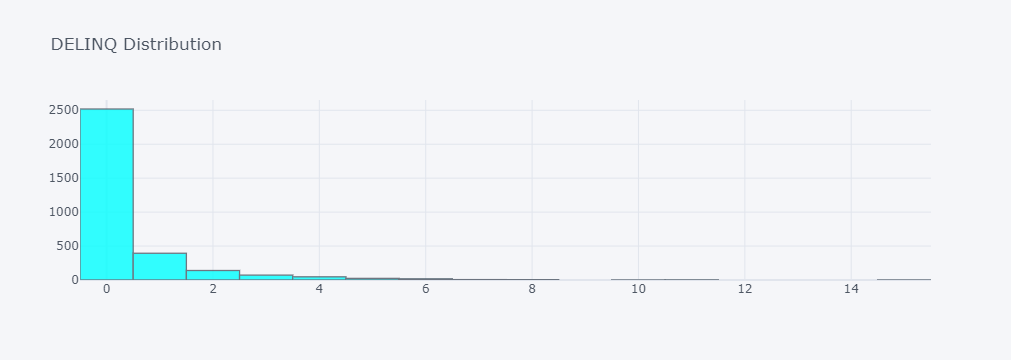

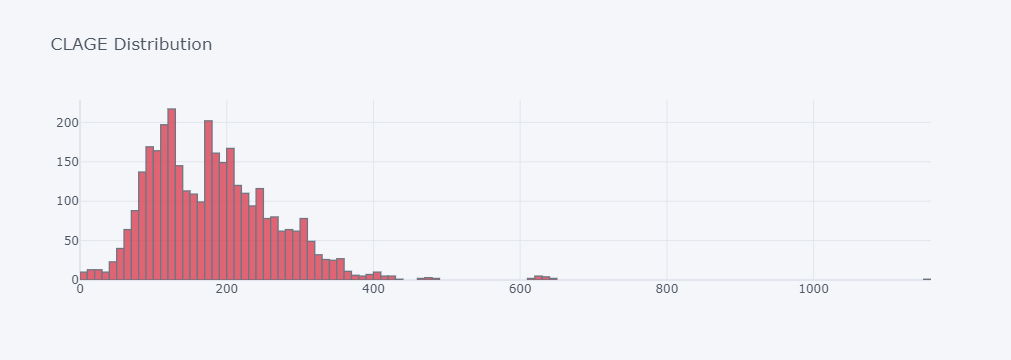

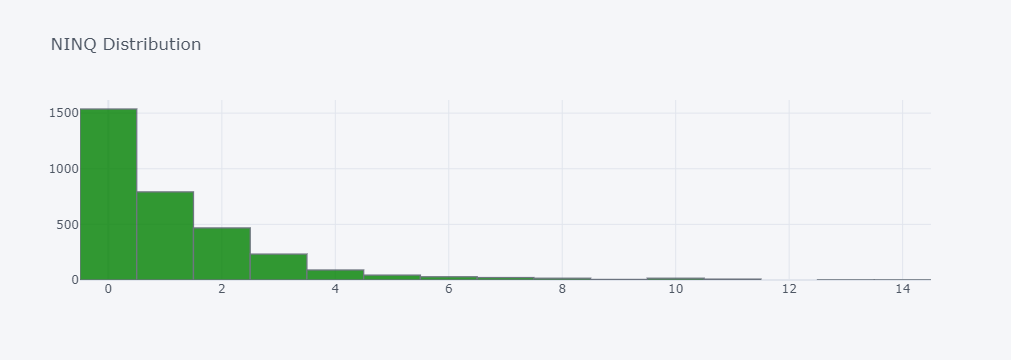

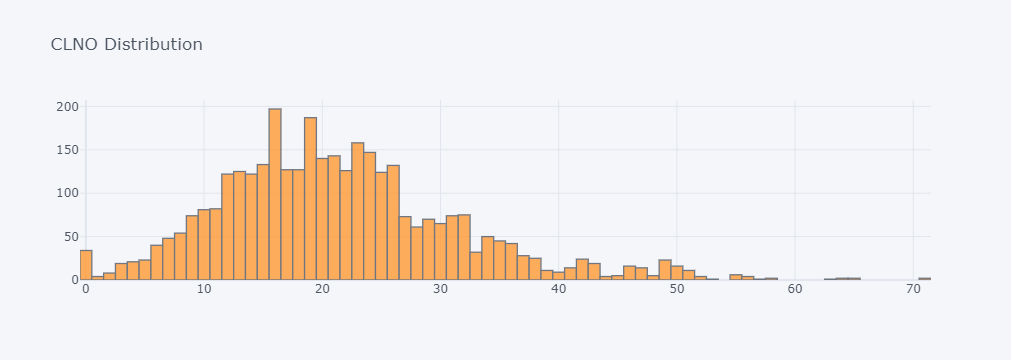

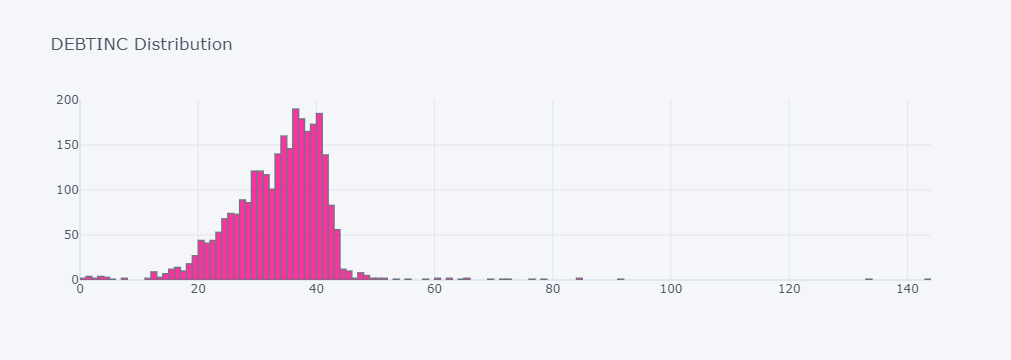

In [14]:
colors = ["red","green","orange","pink","cyan","red","green","orange","pink"]
for color,col in enumerate(Floats):    
    Train[col].iplot(kind='histogram',title = f"{col} Distribution",color = colors[color], filename='histogram-subplots')

### Categoric Variables

now we will inspect categoric variables:

In [15]:
Cats = Train.select_dtypes(include = "object").columns.tolist()[::-1] #float variables
Train[Cats].describe(include = "object")

,JOB,REASON
count,3411,3426
unique,6,2
top,Other,DebtCon
freq,1446,2381


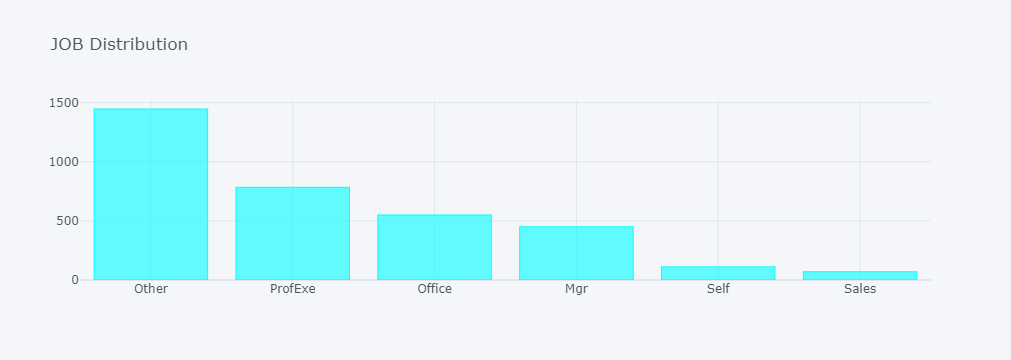

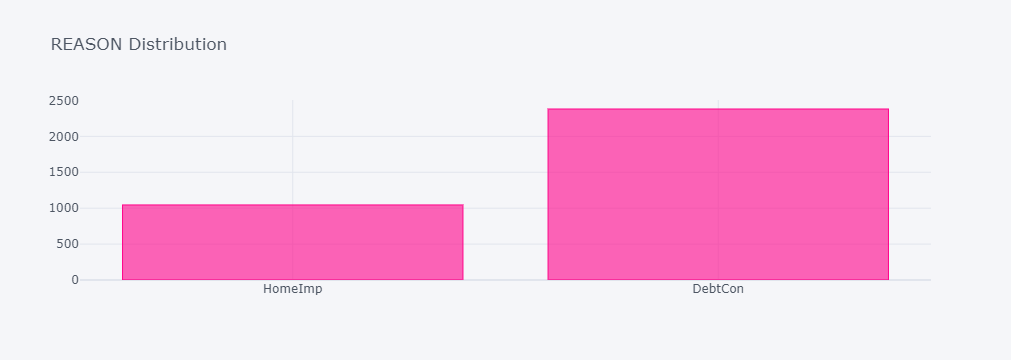

In [16]:
colors = ["cyan","pink"]
for i,col in enumerate(Cats):    
    Train[col].value_counts().sort_values(ascending = bool(i)).iplot(kind='bar',title = f"{col} Distribution",color = colors[i], filename='bar-subplots')

#### Insights so far:
1. target variable:
    * **BAD* - appears to be about 20-80 split in favor of the Loan paid category (0).
2. inputs (Continuous):
    * **LOAN, MORTDUE, VALUE, CLAGE, DEBTINC** - appears to be right skewd (mean>median>mode).
3. inputs (Discrete):
    * **YOJ, DEROG, DELINQ, NINQ, CLNO** - most of the data are in the lower values area in all these inputs.
4. inputs (Nominal):
    * **JOB** - alot of Jobs are classified as Other, the rest of the categories are significantly lower.
    * **REASON** - most of the reasons for loan requests are for debt debt consolidation.
    
REASON


### Relation to target
Now an analysis of how the inputs are each distributed in relation to the targed `BAD`:

**LOAN**

In [28]:
Train[['LOAN','BAD']].groupby(['BAD']).describe()

LOAN                                                                 \
      count          mean           std     min      25%      50%      75%   
BAD                                                                          
0    2870.0  18953.832753  11185.869579  1700.0  11700.0  16700.0  23500.0   
1     706.0  16673.796034  11594.211397  1100.0   8500.0  14500.0  21800.0   

              
         max  
BAD           
0    89200.0  
1    77200.0

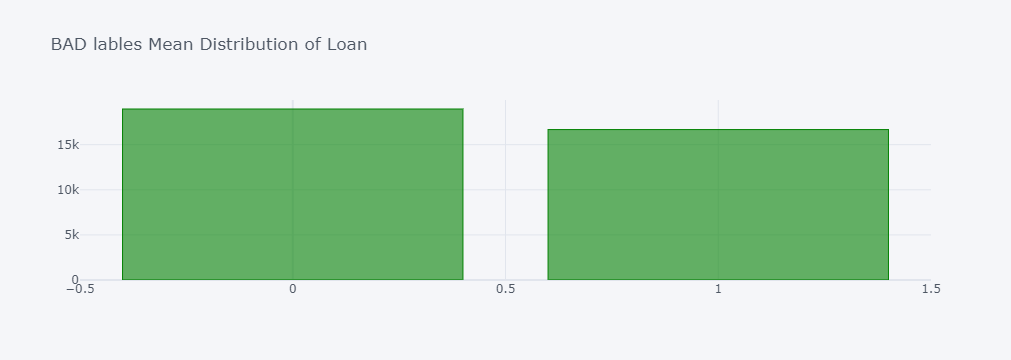

In [37]:
Train[['LOAN','BAD']].groupby(['BAD']).mean().iplot(kind='bar',title = "BAD lables Mean Distribution of Loan",color = ["green"])

### Continuous Variables

In [35]:
pd.set_option('display.max_columns', 32)#show all columns.
Continuous = ["MORTDUE", "VALUE", "CLAGE", "DEBTINC"]
Train[Continuous + ["BAD"]].groupby(['BAD']).describe()

MORTDUE                                                                   \
      count          mean           std     min       25%      50%       75%   
BAD                                                                            
0    2634.0  74243.134248  42820.285102  2619.0  47372.75  66496.5  92775.25   
1     638.0  69712.961097  48201.008262  2063.0  39591.75  60027.0  84885.75   

                VALUE                                                          \
          max   count           mean           std     min       25%      50%   
BAD                                                                             
0    365528.0  2864.0  102546.422161  52155.714632  8000.0  67455.00  90756.5   
1    399550.0   640.0   95646.879391  65535.033795  8800.0  58338.75  81000.0   

                          CLAGE                                               \
          75%       max   count        mean        std       min         25%   
BAD                                                                            
0    119516.0  471827.0  2726.0  187.923951  85.467146  0.486711  120.865352   
1    112775.0  855909.0   658.0  151.080710  84.185670  2.033333   95.958333   

                                         DEBTINC                        \
            50%         75%          max   count       mean        std   
BAD                                                                      
0    180.829676  240.817780   649.747104  2590.0  33.150168   6.968781   
1    132.467512  196.311142  1154.633333   241.0  39.547081  15.430446   

                                                            
          min        25%        50%        75%         max  
BAD                                                         
0    0.720295  28.890646  34.453213  38.703599   45.569843  
1    0.838118  33.126484  38.228345  43.458327  143.949605

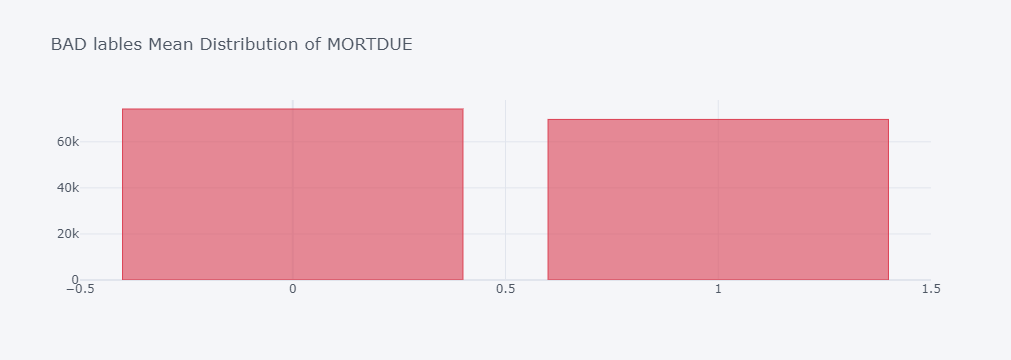

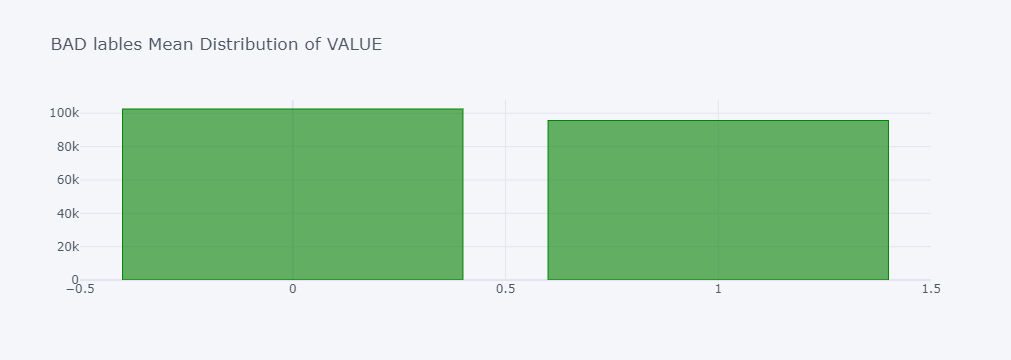

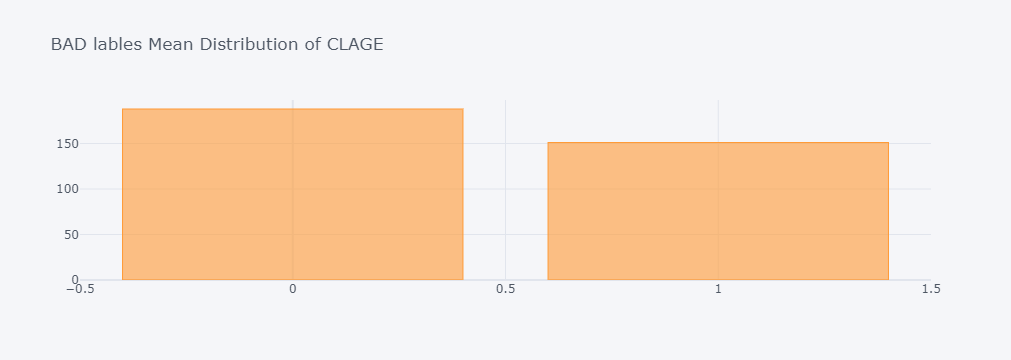

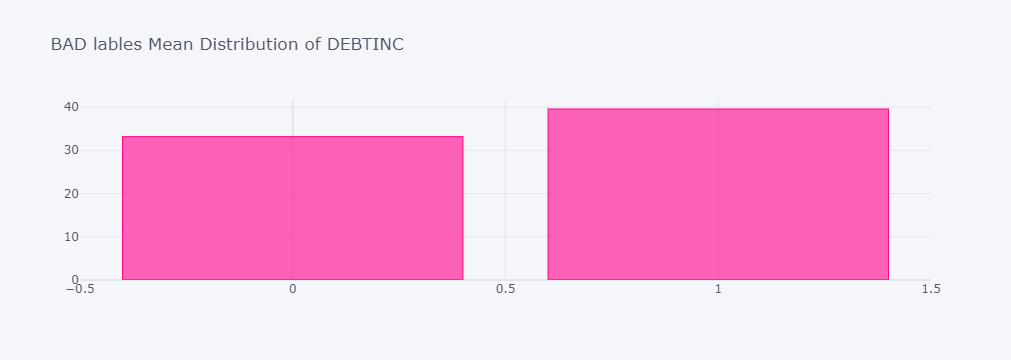

In [48]:
colors = ["red","green","orange","pink"]
for i,col in enumerate(Continuous):
    Train[[col,'BAD']].groupby(['BAD']).mean().iplot(kind='bar',title = f"BAD lables Mean Distribution of {col}",color = [colors[i]])

### Discrete Variables

In [74]:
pd.set_option('display.max_columns', 40)#show all columns.
Discrete = ["YOJ", "DEROG", "DELINQ", "NINQ", "CLNO"]
Train[Discrete + ["BAD"]].groupby(['BAD']).describe()

YOJ                                                  DEROG            \
      count      mean       std  min  25%  50%   75%   max   count      mean   
BAD                                                                            
0    2591.0  9.271324  7.722300  0.0  3.0  7.0  14.0  36.0  2501.0  0.130348   
1     673.0  7.957207  7.020337  0.0  2.5  6.0  12.0  41.0   650.0  0.660000   

                                         DELINQ                                \
          std  min  25%  50%  75%   max   count      mean       std  min  25%   
BAD                                                                             
0    0.518269  0.0  0.0  0.0  0.0   6.0  2569.0  0.242896  0.674535  0.0  0.0   
1    1.397698  0.0  0.0  0.0  1.0  10.0   660.0  1.228788  1.934611  0.0  0.0   

                       NINQ                                                \
     50%  75%   max   count      mean       std  min  25%  50%  75%   max   
BAD                                                                         
0    0.0  0.0   5.0  2603.0  1.036496  1.551267  0.0  0.0  1.0  2.0  11.0   
1    0.0  2.0  15.0   659.0  1.646434  2.114007  0.0  0.0  1.0  2.0  14.0   

       CLNO                                                      
      count       mean        std  min   25%   50%    75%   max  
BAD                                                              
0    2764.0  21.287265   9.645769  0.0  15.0  20.0  26.00  56.0  
1     670.0  21.461194  11.957854  0.0  14.0  20.0  27.75  71.0

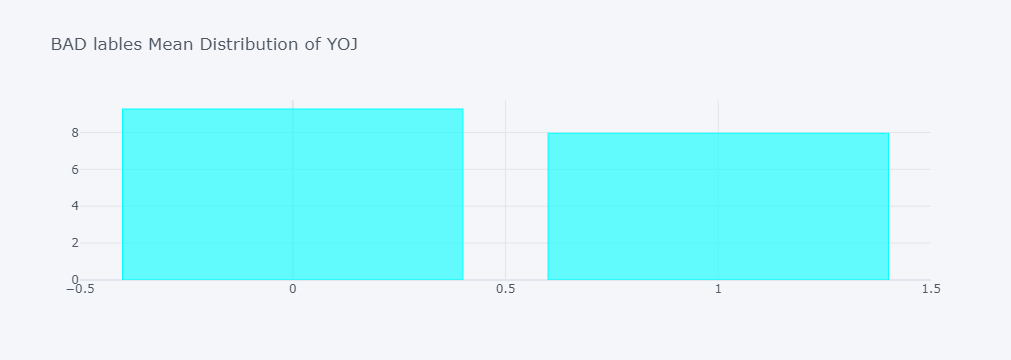

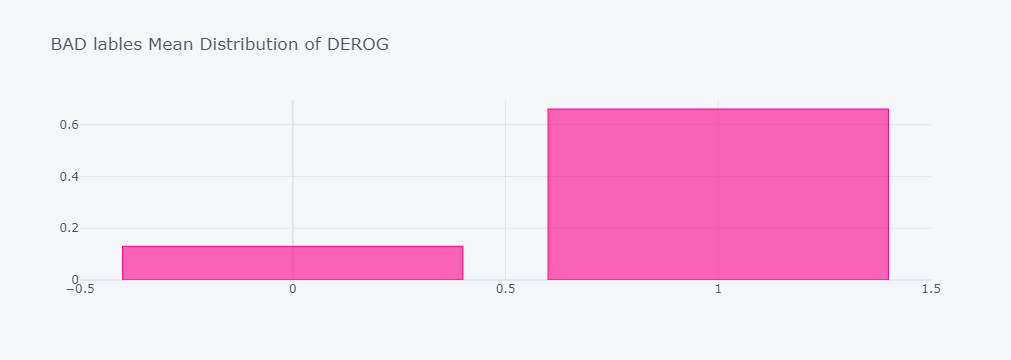

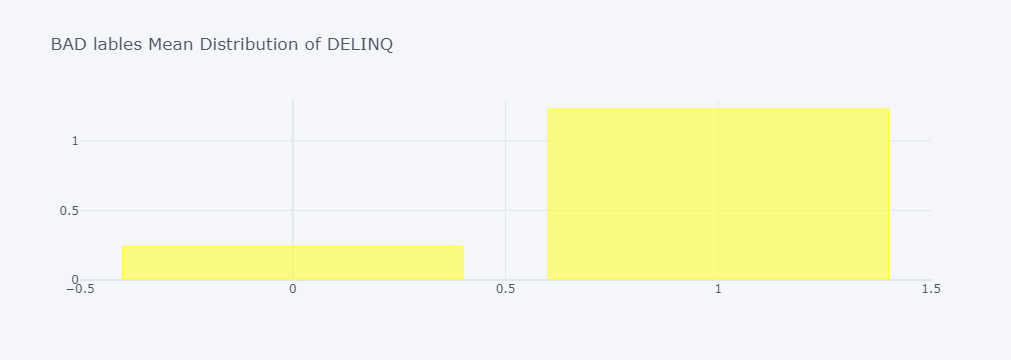

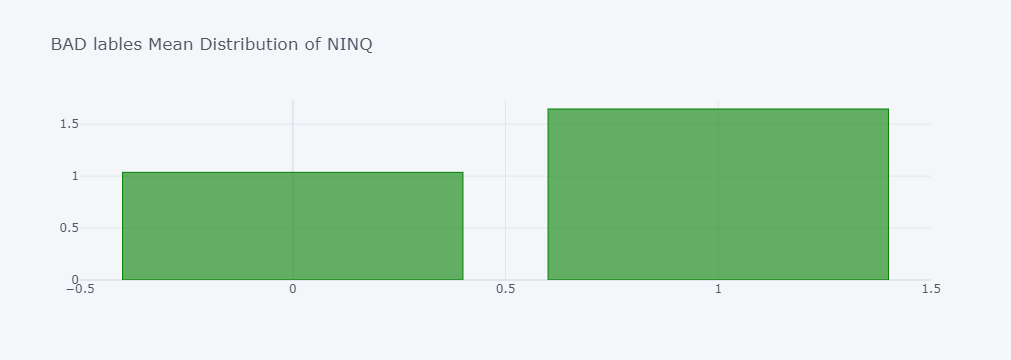

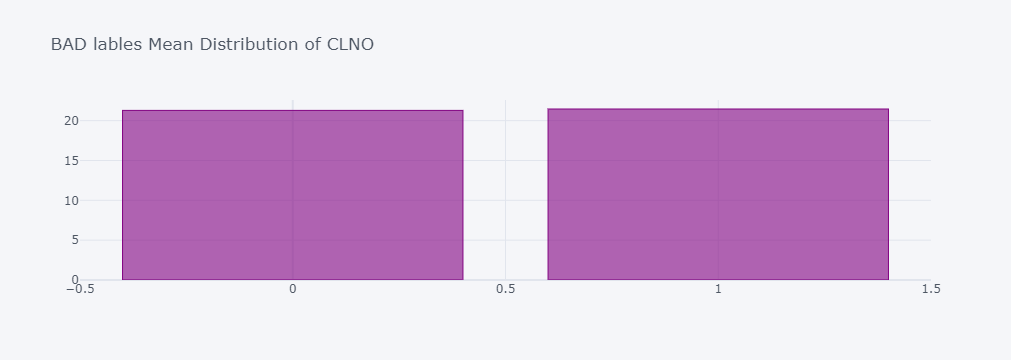

In [49]:
colors = ["purple","green","yellow","pink","cyan"][::-1]
for i,col in enumerate(Discrete):
    Train[[col,'BAD']].groupby(['BAD']).mean().iplot(kind='bar',title = f"BAD lables Mean Distribution of {col}",color = [colors[i]])

In [79]:
#DEROG
default_derog = Train[Train['BAD']==1]['DEROG'].value_counts().sort_values(ascending = False)
paid_derog = Train[Train['BAD']==0]['DEROG'].value_counts()
bad_derog = pd.DataFrame([default_derog,paid_derog])
bad_derog.index = ['Default','Paid']
bad_derog.fillna(0)

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,10.0
Default,450.0,100.0,52.0,20.0,9.0,4.0,6.0,3.0,4.0,2.0
Paid,2281.0,158.0,43.0,8.0,2.0,4.0,5.0,0.0,0.0,0.0


### Categoric (nominal) Variables

In [62]:
default_job = Train[Train['BAD']==1]['JOB'].value_counts().sort_values(ascending = False)
paid_job = Train[Train['BAD']==0]['JOB'].value_counts()
job_bad = pd.DataFrame([default_job,paid_job])
job_bad.index = ['Default','Paid']
job_bad

,Other,ProfExe,Mgr,Office,Self,Sales
Default,336,124,112,71,36,15
Paid,1110,660,338,479,75,55


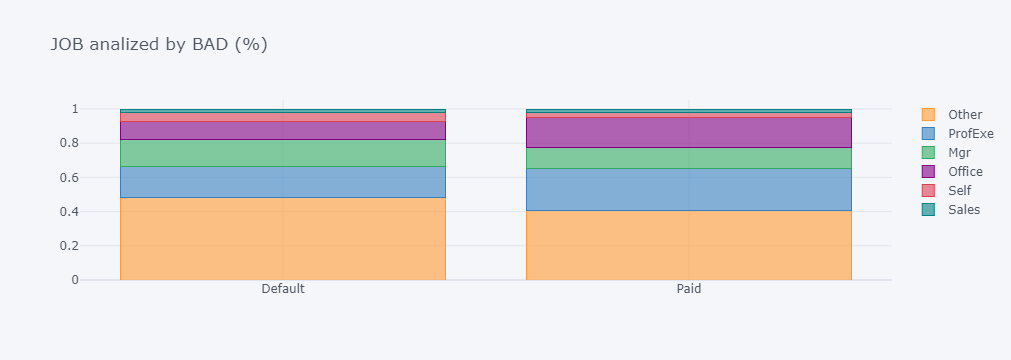

In [64]:
#normalize
default_job_n = Train[Train['BAD']==1]['JOB'].value_counts(normalize=True).sort_values(ascending = False)
paid_job_n = Train[Train['BAD']==0]['JOB'].value_counts(normalize=True)
job_bad_n = pd.DataFrame([default_job_n,paid_job_n])
job_bad_n.index = ['Default','Paid']
job_bad_n.iplot(kind='bar',barmode='stack',title = "JOB analized by BAD (%)")

In [82]:
default_reason = Train[Train['BAD']==1]['REASON'].value_counts().sort_values(ascending = False)
paid_reason = Train[Train['BAD']==0]['REASON'].value_counts()
reason_bad = pd.DataFrame([default_reason,paid_reason])
reason_bad.index = ['Default','Paid']
reason_bad = reason_bad.T
reason_bad

,Default,Paid
DebtCon,446,1935
HomeImp,231,814


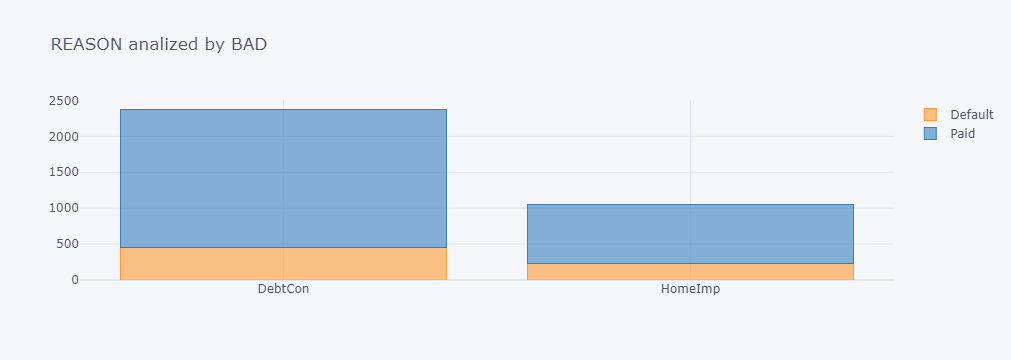

In [84]:
reason_bad.iplot(kind='bar',barmode='stack',title = "REASON analized by BAD")

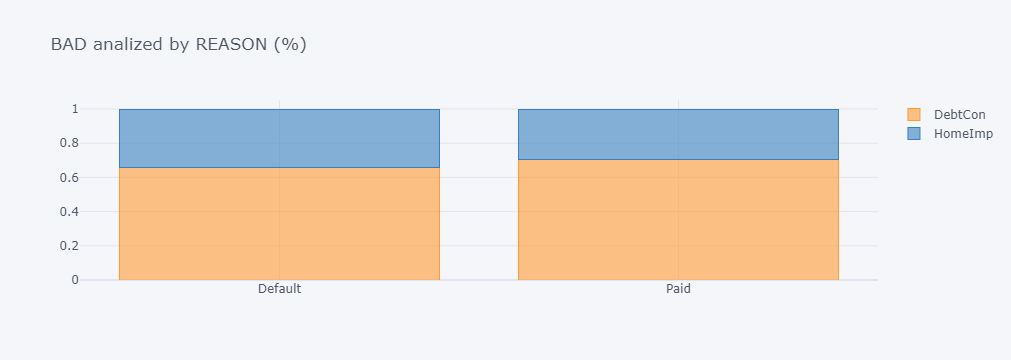

In [85]:
default_reason_n = Train[Train['BAD']==1]['REASON'].value_counts(normalize=True).sort_values(ascending = False)
paid_reason_n = Train[Train['BAD']==0]['REASON'].value_counts(normalize=True)
reason_bad_n = pd.DataFrame([default_reason_n,paid_reason_n])
reason_bad_n.index = ['Default','Paid']
reason_bad_n.iplot(kind='bar',barmode='stack',title = "BAD analized by REASON (%)")

#### Insights:
1. inputs (Continuous):
    * **LOAN** - defaulters on average takes a smaller loan than none defaulters.
    * **MORTDUE** - defaulters on average have smaller amount due on existing mortgage.
    * **VALUE** - defaulters house value is smaller on average.
    * **CLAGE** - defaulters average credit traidline is higher on average than none defaulters.
    * **DEBTINC** - defaulters Debt to income ratio is smaller on average than none defaulters.
2. inputs (Discrete):
    * **YOJ** - defaulters on average have less years of expirience in the current job their in.
    * **DEROG** - most of the loan owners dont have any derogatory mark but the ones who do are mostly defaulters 
    * **DELINQ** - most of the loan owners dont have any delinq credit lines but the ones who do are mostly defaulters.
    * **NINQ** - defaulters on average have more recent credit lines then none defaulters.
    * **CLNO** - defaulters on average have about the same amount of credit lines then none defaulters.
    
3. inputs (Nominal):
    * **JOB** - jobs like Mgr and self have more defaulters than the original distribution.
    * **REASON** - home improvement have a slighly higher default rate than debt consolidation.
 
 # conclusion for EDA
 
 the data is not cleaned and shaped in the optimal way for making classifications.
 in the predictions notebook, the data will go through preprocessing and feature engineering based on insights from this analysis
 and predictions will be made with a few baselines for comparison between a few models.
